In [1]:
%pylab inline

import numpy as np
from scipy.optimize import curve_fit
import scipy.linalg as lin
import scipy.stats as sst
#import pylab
from StringIO import StringIO

Populating the interactive namespace from numpy and matplotlib


In [42]:
age=np.array([0,0,16,16,16,2,2,32,32,4,4,4,4,8,8,8,8]);

crs = open("all.ico6.areaMap.txt", "r");
d1=crs.read();
data=np.genfromtxt(StringIO(d1),delimiter="\t",skip_header=1);

age=np.concatenate([age[:7],age[9:]])
data=np.concatenate([data[:,:7],data[:,9:]],axis=1)

In [46]:
#age=np.array([0,0,16,16,16,2,2,32,32,4,4,4,4,8,8,8,8]);
print age

[ 0  0 16 16 16  2  2  4  4  4  4  8  8  8  8]


# Fit an exponential, asymptotic growth model to each vertex

In [50]:
def func2(x, p1,p2):
  return p1*(1-np.exp(-x/p2))

def func3(x, p1,p2,p3):
  return p1*(1-np.exp(-(x-p3)/p2))

[  2.19092782  39.47832312 -11.56973693]


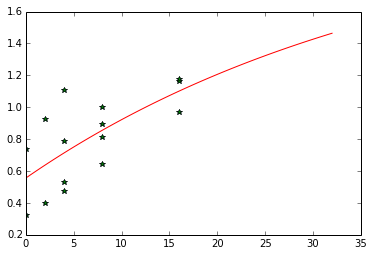

In [52]:
i=7;
xdata=np.array(age);
ydata=np.array(data[i,:])

#popt, pcov = curve_fit(func2, xdata, ydata,p0=(1.0,0.2))
popt, pcov = curve_fit(func3, xdata, ydata,p0=(1.0,0.2,4))

pylab.plot(xdata,ydata,'*')
curvex=np.linspace(0,32,100)

#curvey=func2(curvex,popt[0],popt[1])
curvey=func3(curvex,popt[0],popt[1],popt[2])

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
print popt

In [20]:
fo=open("areagrowth.tau.txt","w");
fo.write("%i\n"%len(data));
xdata=np.array(age);
np.seterr(all='ignore')
for i in range(0,len(data)):
    ydata=np.array(data[i,:])
    popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))
    fo.write("%f\n" % popt[1]);
fo.close();

In [21]:
fo=open("areagrowth.asymp.txt","w");
fo.write("%i\n"%len(data));
xdata=np.array(age);
np.seterr(all='ignore')
for i in range(0,len(data)):
    ydata=np.array(data[i,:])
    popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))
    fo.write("%f\n" % popt[0]);
fo.close();

# Compute area ratio change from P0 to P16

In [15]:
fo=open("arearatio.16over0.txt","w");
fo.write("%i\n"%len(data));
np.seterr(all='ignore')
for i in range(0,len(data)):
    fo.write("%f\n" % ((data[i,2]+data[i,3])/(data[i,0]+data[i,1])));
fo.close();

#4D Von Bertalanfy fitting
Each vertex's x, y and z coordinates are fit with a VB model

In [53]:
for i in (2200, 2201, 2203, 2204,
          2202, 2206, 2209, 2212,
          2205, 2215, 2225, 2236,
          2235, ):
    print i;

a
b
c
d
